In [3]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.mask import mask as rmask

# Crop Image

In [ ]:
DIR_INPUT = 'RawData'
DIR_OUTPUT = 'TrainData'

In [ ]:
# please load the lake_regions.gpkg here
gdf_roi = gpd.read_file(os.path.join(DIR_INPUT, 'lakes_regions.gpkg'))
print(gdf_roi.shape)

(6, 2)


In [ ]:
# please load the large sentinel image here as a list
ls_img = glob(os.path.join(DIR_INPUT, '*.tif'))
ls_img.sort()
ls_img

['RawData/Greenland26X_22W_Sentinel2_2019-06-03_05.tif',
 'RawData/Greenland26X_22W_Sentinel2_2019-06-19_20.tif',
 'RawData/Greenland26X_22W_Sentinel2_2019-07-31_25-003.tif',
 'RawData/Greenland26X_22W_Sentinel2_2019-08-25_29-004.tif']

In [ ]:
# define the output folder for cropped images 
dir_output = os.path.join(DIR_OUTPUT, 'Processed')
if not os.path.exists(dir_output): 
  os.makedirs(dir_output)

In [ ]:
for tif_path in ls_img:
  cur_date = os.path.basename(tif_path).split('_')[-2]

  for i in range(6):
    geoms = gdf_roi.geometry.values[i]

    with rasterio.open(tif_path) as src:
      # Crop the raster using the shape
      out_image, out_transform = rmask(src, [geoms], crop=True)

      # Update metadata
      out_meta = src.meta.copy()
      out_meta.update({
          "driver": "GTiff",
          "height": out_image.shape[1],
          "width": out_image.shape[2],
          "transform": out_transform
      })

    # output
    output_name = os.path.join(dir_output, cur_date+'_roi'+str(i)+'.tif')
    with rasterio.open(output_name, "w", **out_meta) as dest:
        dest.write(out_image)



Processing 2019-08-25: 100%|██████████| 6/6 [05:43<00:00, 57.20s/it]


In [ ]:
tmp = 'TrainData/Processed/2019-06-03_roi4.tif'

In [ ]:
with rasterio.open(output_name) as src:
    # Read the dataset's valid data mask as a ndarray.
    data = [src.read(i+1) for i in range(3)]  # 1 denotes band 1

data = np.stack(data, axis=-1)
data.shape

(22641, 28235, 3)

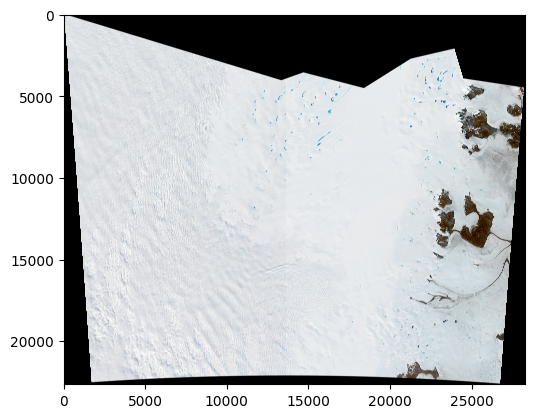

In [ ]:
plt.imshow(data)